In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv('spam.csv')

# Display the dataset
print(df)


      label                                               text
0         0  They said ü dun haf passport or smth like dat....
1         0  Multiply the numbers independently and count d...
2         0  Have a lovely night and when you wake up to se...
3         0                                       Ard 4 lor...
4         0  You are right. Meanwhile how's project twins c...
...     ...                                                ...
2468      1  Want explicit SEX in 30 secs? Ring 02073162414...
2469      1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
2470      1  Had your contract mobile 11 Mnths? Latest Moto...
2471      1  REMINDER FROM O2: To get 2.50 pounds free call...
2472      1  This is the 2nd time we have tried 2 contact u...

[2473 rows x 2 columns]


In [3]:
# Convert text to lowercase
df['text'] = df['text'].str.lower()

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Remove stop words
stop_words = set(stopwords.words('english'))
sequences = [[word for word in sequence if word not in stop_words] for sequence in sequences]

# Pad sequences
sequences = pad_sequences(sequences)

# Update the 'sequences' variable with the preprocessed sequences
sequences



array([[   0,    0,    0, ...,   20,  686,  291],
       [   0,    0,    0, ...,    3, 2925,    2],
       [   0,    0,    0, ...,    4,  162,  279],
       ...,
       [   0,    0,    0, ...,  867,   30, 1193],
       [   0,    0,    0, ...,   35,   10, 1796],
       [   0,    0,    0, ...,  284,  315,  220]])

In [4]:
# Split the preprocessed sequences into input (X) and output (y) data
X = sequences
y = df['label'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LSTM model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X_train.shape[1]))

# Add an LSTM layer
model.add(LSTM(units=128))

# Add a Dense layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(X_test)




Epoch 1/10


62/62 [==============================] - 29s 259ms/step - loss: 0.3593 - accuracy: 0.8589 - val_loss: 0.1097 - val_accuracy: 0.9697
Epoch 2/10
62/62 [==============================] - 14s 216ms/step - loss: 0.0642 - accuracy: 0.9823 - val_loss: 0.0862 - val_accuracy: 0.9737
Epoch 3/10
62/62 [==============================] - 14s 221ms/step - loss: 0.0315 - accuracy: 0.9919 - val_loss: 0.0668 - val_accuracy: 0.9818
Epoch 4/10
62/62 [==============================] - 16s 255ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.1092 - val_accuracy: 0.9717
Epoch 5/10
62/62 [==============================] - 14s 233ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.0820 - val_accuracy: 0.9778
Epoch 6/10
62/62 [==============================] - 14s 220ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.1178 - val_accuracy: 0.9758
Epoch 7/10
62/62 [==============================] - 13s 217ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.1146 - val_accuracy: 0.

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

#precision and recall
from sklearn.metrics import precision_score, recall_score
y_pred=model.predict(X_test)
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
print("Precision: ", precision)
print("Recall: ", recall)

16/16 [==============================] - 2s 98ms/step - loss: 0.1302 - accuracy: 0.9798
Test Loss: 0.1301863044500351
Test Accuracy: 0.9797979593276978
16/16 [==============================] - 2s 103ms/step
Precision:  0.9782608695652174
Recall:  0.9507042253521126


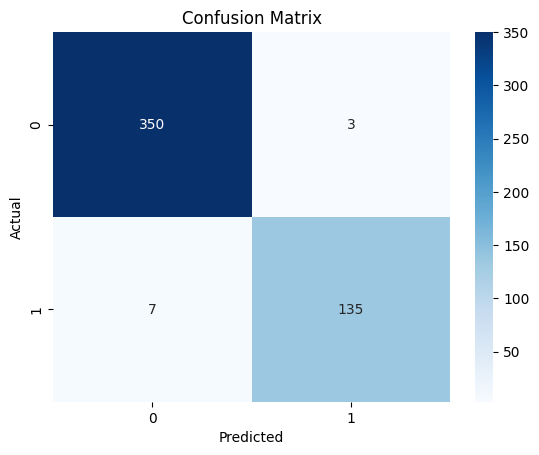

In [6]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions.round())

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()